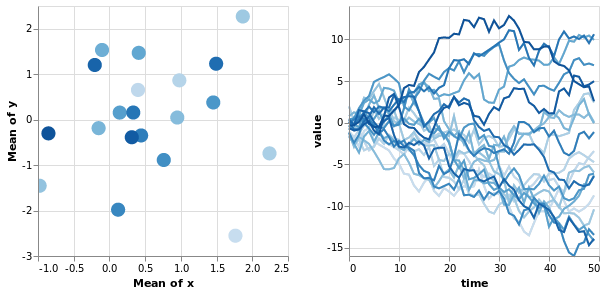

In [1]:
import altair as alt
import pandas as pd
import numpy as np

np.random.seed(0)

n_objects = 20
n_times = 50

# Create one (x, y) pair of metadata per object
locations = pd.DataFrame({
    'id': range(n_objects),
    'x': np.random.randn(n_objects),
    'y': np.random.randn(n_objects)
})

# Create a 50-element time-series for each object
timeseries = pd.DataFrame(np.random.randn(n_times, n_objects).cumsum(0),
                          columns=locations['id'],
                          index=pd.RangeIndex(0, n_times, name='time'))

# Melt the wide-form timeseries into a long-form view
timeseries = timeseries.reset_index().melt('time')

# Merge the (x, y) metadata into the long-form view
timeseries['id'] = timeseries['id'].astype(int)  # make merge not complain
data = pd.merge(timeseries, locations, on='id')

# Data is prepared, now make a chart

selector = alt.selection_single(empty='all', fields=['id'])

base = alt.Chart(data).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x='mean(x)',
    y='mean(y)',
    color=alt.condition(selector, 'id:O', alt.value('lightgray'), legend=None),
).interactive()

timeseries = base.mark_line().encode(
    x='time',
    y=alt.Y('value'),  # scale=alt.Scale(domain=(-15, 15))),
    # When selected, draw line as black in increase contrast
    color=alt.condition(~selector, 'id:O', alt.value('black'), legend=None),
    #color=alt.Color('id:O', legend=None)

).transform_filter(
    selector
)

# Add lightgrey lines to background
bgbase = alt.Chart(data).properties(
    width=250,
    height=250
)
background = bgbase.mark_line().encode(
    x='time',
    y=alt.Y('value'), # scale=alt.Scale(domain=(-15, 15))),
    detail = 'id',
    color=alt.value('lightgray')
)

points | background + timeseries
